In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler ## standrard scalig 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [327]:
df=pd.read_csv("train 2.csv")
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [328]:
df.shape

(913000, 4)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [330]:
df['date']=pd.to_datetime(df['date'])   #Convert datatype of date to pandas date format

Our Aim is to find Total Sales of each item on each day. We are not considering on Store level sales

In [331]:
df=df.groupby(['date','item'],as_index=False)['sales'].sum()  #we are grouping each item on each day
df.head()

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83


In [332]:
df = df.sort_values('date')  #sort by date

In [333]:
a=list(df['item'].unique())
a.sort()
print("Items that are Present are :",*a,"\n")
print("No of items present :",len(a))

Items that are Present are : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

No of items present : 50


In [334]:
print("There are 50 items , ranging from 1 to 50")
print("Enter the item whose demand in the future we need to predict")
n=int(input()) 
ff=df[df['item']==n]                #here we take item number 45

There are 50 items , ranging from 1 to 50
Enter the item whose demand in the future we need to predict
45


In [335]:
ff.head()

,date,item,sales
44,2013-01-01,45,396
94,2013-01-02,45,393
144,2013-01-03,45,459
194,2013-01-04,45,450
244,2013-01-05,45,533


In [336]:
ff=ff.set_index('date')  #convert date into index column
ff.head()

,item,sales
date,,
2013-01-01,45,396
2013-01-02,45,393
2013-01-03,45,459
2013-01-04,45,450
2013-01-05,45,533


In [337]:
ff.drop(columns=['item',],inplace=True)  #Since We already choosen the item, drop the item column
ff.head()

,sales
date,
2013-01-01,396
2013-01-02,393
2013-01-03,459
2013-01-04,450
2013-01-05,533


In [338]:
ff['ThreeMonth']=ff.rolling(window=90).sum()
ff.dropna(inplace=True)
#ff.drop(columns=['sales'],inplace=True)
ff.head()

,sales,ThreeMonth
date,,
2013-03-31,712,47070.0
2013-04-01,557,47231.0
2013-04-02,644,47482.0
2013-04-03,653,47676.0
2013-04-04,717,47943.0


Text(0.5, 1.0, 'Everyday sales of item 45')

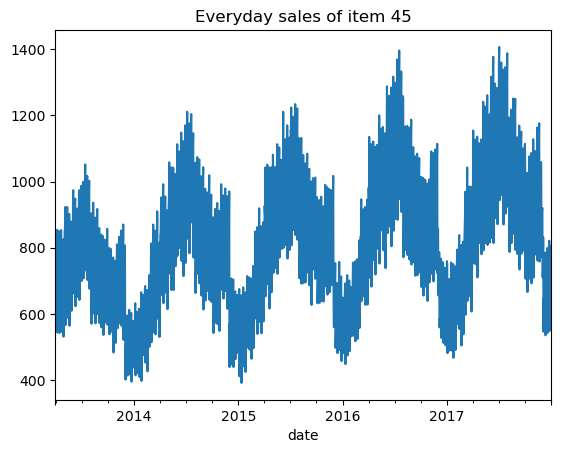

In [339]:
ff["sales"].plot();
plt.title(f"Everyday sales of item {n}")

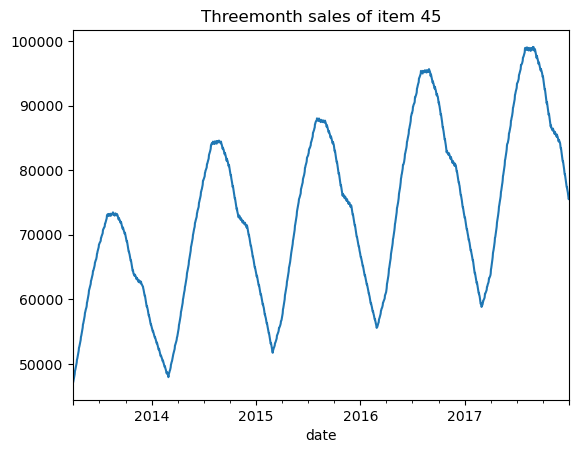

In [340]:
ff["ThreeMonth"].plot();
plt.title(f"Threemonth sales of item {n}");

## Data Engineering: Create New Featues

In [341]:
ff['dayofweek'] = ff.index.dayofweek
ff['quarter'] = ff.index.quarter
ff['month'] = ff.index.month
ff['year'] = ff.index.year
ff['dayofyear'] = ff.index.dayofyear
ff['dayofmonth'] = ff.index.day
ff['weekofyear'] = ff.index.isocalendar().week 

In [342]:
ff.dtypes

sales           int64
ThreeMonth    float64
dayofweek       int64
quarter         int64
month           int64
year            int64
dayofyear       int64
dayofmonth      int64
weekofyear     UInt32
dtype: object

In [343]:
ff['weekofyear']=ff['weekofyear'].astype("int64")  #We have to change datatype of weekofyear
ff['weekofyear'].dtype

dtype('int64')

In [344]:
ff.columns

Index(['sales', 'ThreeMonth', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [345]:
ff=ff[[ 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear','sales','ThreeMonth']]
ff.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales,ThreeMonth
date,,,,,,,,,
2013-03-31,6,1,3,2013,90,31,13,712,47070.0
2013-04-01,0,2,4,2013,91,1,14,557,47231.0
2013-04-02,1,2,4,2013,92,2,14,644,47482.0
2013-04-03,2,2,4,2013,93,3,14,653,47676.0
2013-04-04,3,2,4,2013,94,4,14,717,47943.0


## EDA

### dayofweek

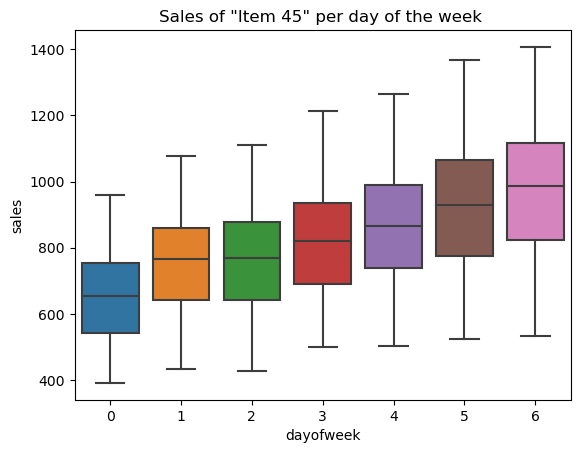

In [346]:
#fig, ax = plt.subplots(figsize=(10, 8))
ax=sns.boxplot(data=ff, x='dayofweek', y='sales')
ax.set_title(f'Sales of "Item {n}" per day of the week ')
plt.show()

Conclusion:
- During weekend there's high sales of this item

### quarter

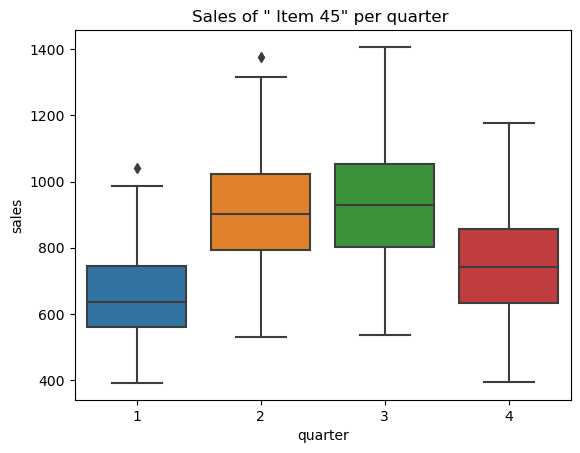

In [347]:
ax=sns.boxplot(data=ff, x='quarter', y='sales')
ax.set_title(f'Sales of " Item {n}" per quarter ')
plt.show()

Conclusion:
- During 2nd and 3rd quarter there's high sales of this item

### month

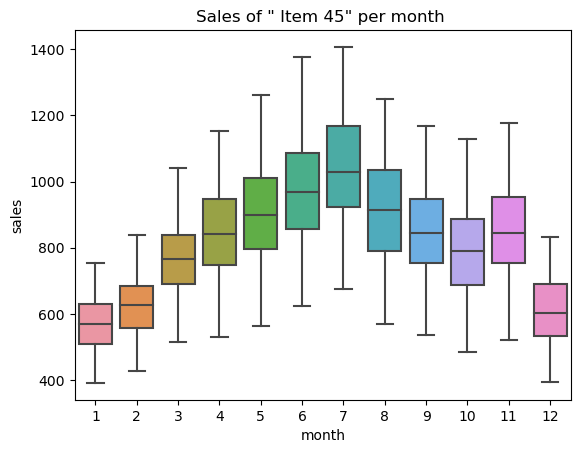

In [348]:
ax=sns.boxplot(data=ff, x='month', y='sales')
ax.set_title(f'Sales of " Item {n}" per month ')
plt.show()

Conclusion:
- During the month of June,July,August there's high sales of this item

### year

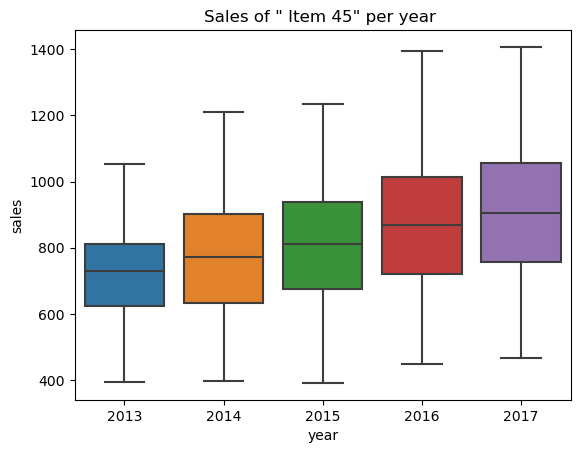

In [349]:
ax=sns.boxplot(data=ff, x='year', y='sales')
ax.set_title(f'Sales of " Item {n}" per year ')
plt.show()

Conclusion:
- Recent year there's increase in sales of this item

### dayofmonth

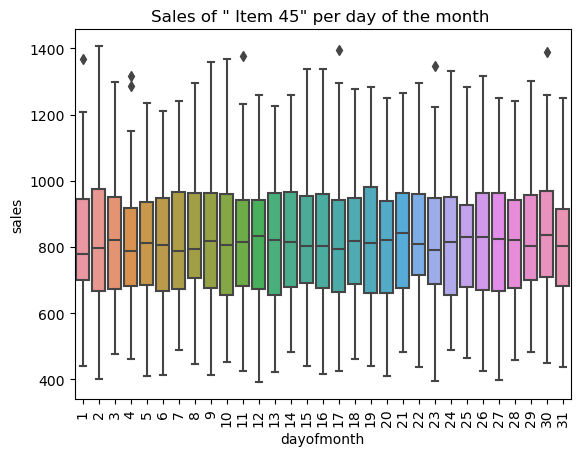

In [350]:
ax=sns.boxplot(data=ff, x='dayofmonth', y='sales')
ax.tick_params(axis='x',rotation=90)
ax.set_title(f'Sales of " Item {n}" per day of the month ')
plt.show()

Conclusion:
- There's no day that we can see affect the increment or decremnet of sales

### dayofyear

In [351]:
df01=ff.groupby(["dayofyear"])["sales"].sum().to_frame()
df01.rename(columns={"job":'count'},inplace=True)
df01.reset_index()

,dayofyear,sales
0,1,2388
1,2,2276
2,3,2381
3,4,2313
4,5,2179
...,...,...
361,362,3004
362,363,2972
363,364,2978
364,365,3111


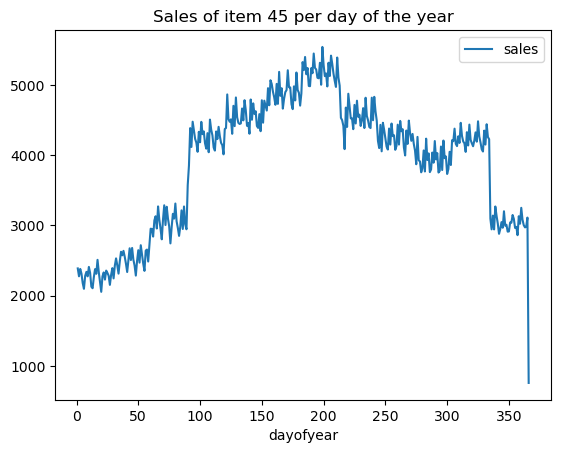

In [352]:
ax=sns.lineplot(data=df01);
ax.set_title(f'Sales of item {n} per day of the year');
#df01.plot();

Conclusion:
- during Middle of the year Sales of this item is increasing

### weekofyear

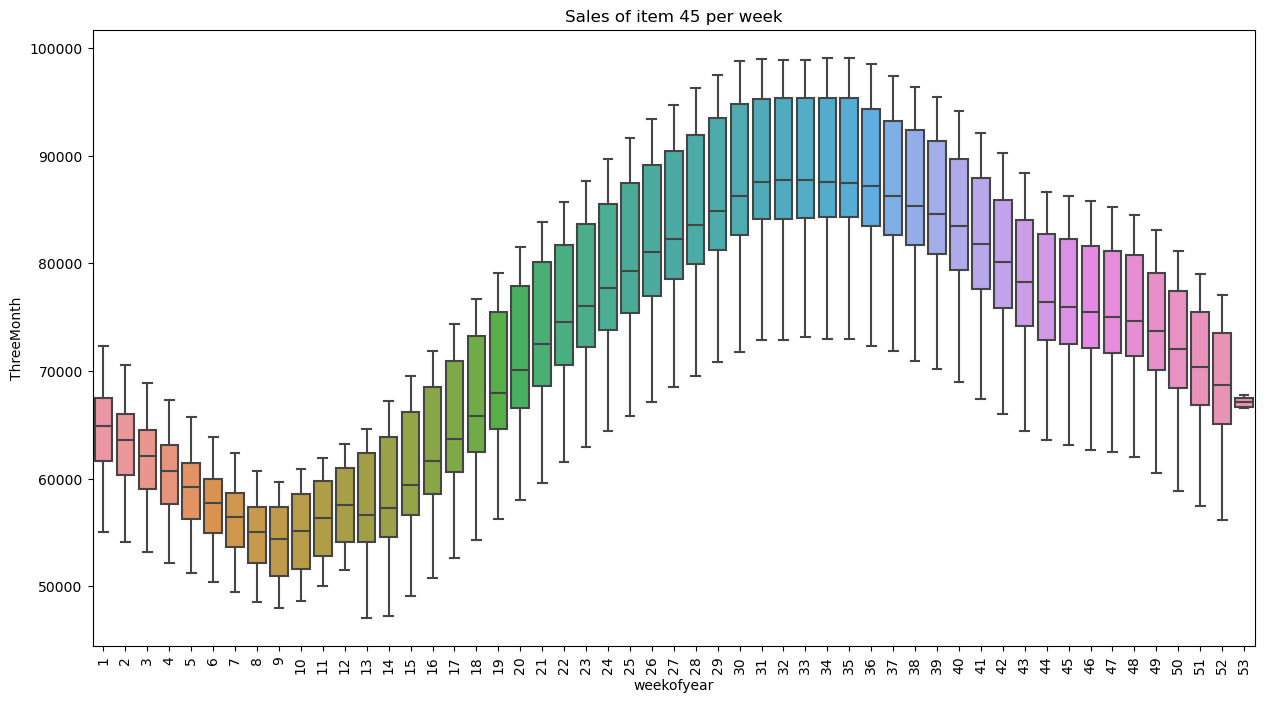

In [353]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(data=ff, x='weekofyear', y='ThreeMonth')
ax.tick_params(axis='x',rotation=90)
ax.set_title(f'Sales of item {n} per week')
plt.show()

Conclusion:
- During week number 29 sales is increasing of this item

## Train Test Split

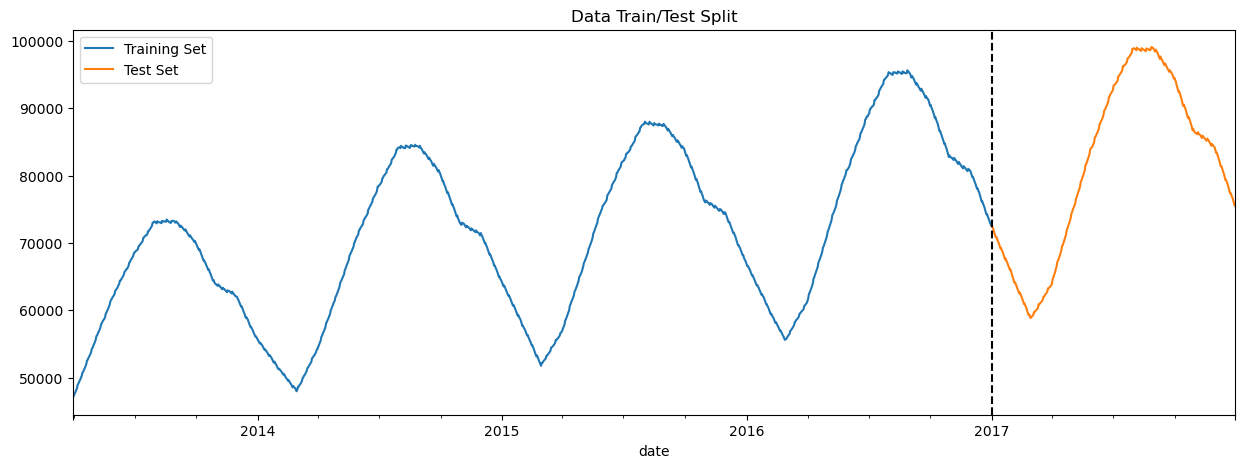

In [354]:
train = ff.loc[ff.index < '2017-01-01','ThreeMonth']
test = ff.loc[ff.index >= '2017-01-01','ThreeMonth']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2017-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [355]:
train.head()

date
2013-03-31    47070.0
2013-04-01    47231.0
2013-04-02    47482.0
2013-04-03    47676.0
2013-04-04    47943.0
Name: ThreeMonth, dtype: float64

In [356]:
train = ff.loc[ff.index < '2017-01-01']
test = ff.loc[ff.index >= '2017-01-01']

In [357]:
train.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales,ThreeMonth
date,,,,,,,,,
2013-03-31,6,1,3,2013,90,31,13,712,47070.0
2013-04-01,0,2,4,2013,91,1,14,557,47231.0
2013-04-02,1,2,4,2013,92,2,14,644,47482.0
2013-04-03,2,2,4,2013,93,3,14,653,47676.0
2013-04-04,3,2,4,2013,94,4,14,717,47943.0


In [358]:
X_train = train.drop(columns=['ThreeMonth'])
y_train = train['ThreeMonth']

X_test = test.drop(columns=['ThreeMonth'])
y_test = test['ThreeMonth']
print(train.shape)
print(test.shape)

(1372, 9)
(365, 9)


## XGBoost Regressor

In [389]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
    model.fit(X_train,y_train) #train the model
    model.score(X_test, y_test) # scoring the model - r2 squared
    print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -3.758986666481907  Cross-Val score :  -22.317161330814844
Learning rate :  0.02  Train score :  0.35201324331533024  Cross-Val score :  -2.6493755090544044
Learning rate :  0.03  Train score :  0.9123211887302045  Cross-Val score :  0.16871858940642379
Learning rate :  0.04  Train score :  0.9879229535254644  Cross-Val score :  0.5585531436606695
Learning rate :  0.05  Train score :  0.9980992973161666  Cross-Val score :  0.6180738983121417
Learning rate :  0.06  Train score :  0.9995637493177155  Cross-Val score :  0.6545160968133393
Learning rate :  0.07  Train score :  0.9997681562064616  Cross-Val score :  0.6305957010700706
Learning rate :  0.08  Train score :  0.9997969185057989  Cross-Val score :  0.6400596521722859
Learning rate :  0.09  Train score :  0.9998400846321991  Cross-Val score :  0.630214874883769
Learning rate :  0.1  Train score :  0.9998816256854515  Cross-Val score :  0.6424828385955694
Learning rate :  0.11  Train score :  

In [390]:
model = XGBRegressor(learning_rate = 0.13, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)

0.9328068914821259

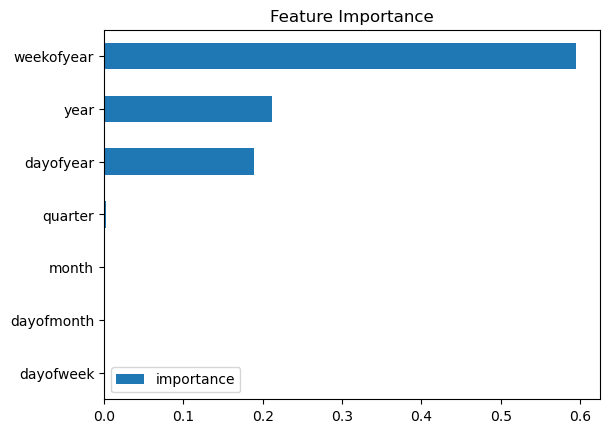

In [391]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- week of the year is most important feature while predicting threemonth sales from XGBoost Model

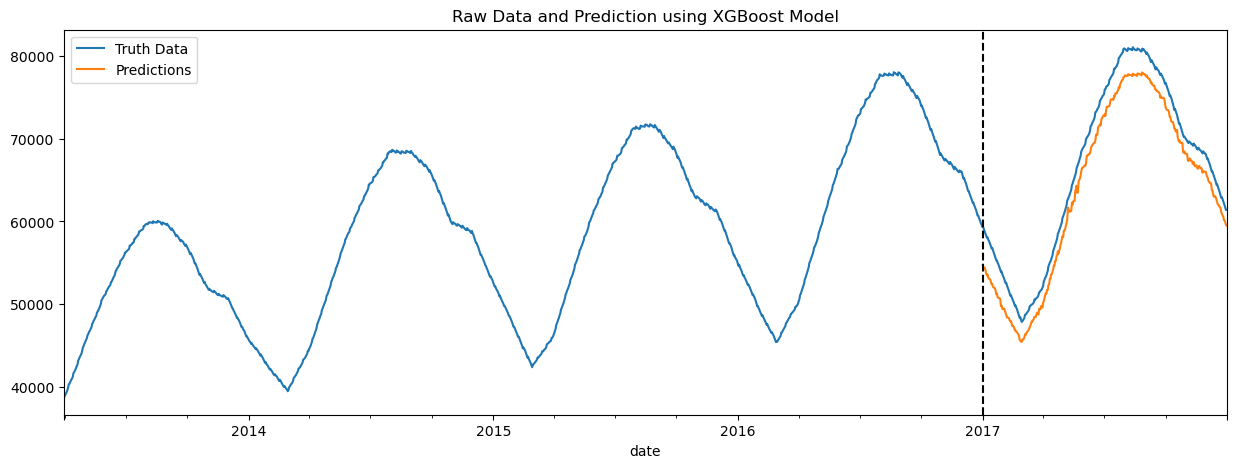

In [392]:
test['prediction_xgb'] = model.predict(X_test)
ff = ff.merge(test[['prediction_xgb']], how='left', left_index=True, right_index=True)
ax = ff[['ThreeMonth']].plot(figsize=(15, 5))
ff['prediction_xgb'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction using XGBoost Model')
ax.axvline('2017-01-01', color='black', ls='--')
plt.show()

In [394]:
test.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ThreeMonth,prediction_xgb
date,,,,,,,,,
2017-01-01,6,1,1,2017,1,1,52,59427.0,54693.132812
2017-01-02,0,1,1,2017,2,2,1,59179.0,54470.976562
2017-01-03,1,1,1,2017,3,3,1,58966.0,54427.281250
2017-01-04,2,1,1,2017,4,4,1,58737.0,54388.218750
2017-01-05,3,1,1,2017,5,5,1,58501.0,54074.296875


In [395]:
score = np.sqrt(mean_squared_error(test['ThreeMonth'], test['prediction_xgb']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 2744.61


In [303]:
#test.loc[:,'error'] = abs(test['ThreeMonth'] - test['prediction'])
#test.head()

In [304]:
#test.sort_values(by='error',ascending=False)

In [305]:
#test['ThreeMonth'].sum()

In [306]:
#from math import ceil
#ceil(test['prediction'].sum())

## DecisionTree Regressor

In [396]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train) 

DecisionTreeRegressor()

In [397]:
y_pred=dt.predict(X_test)
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9354105769076709


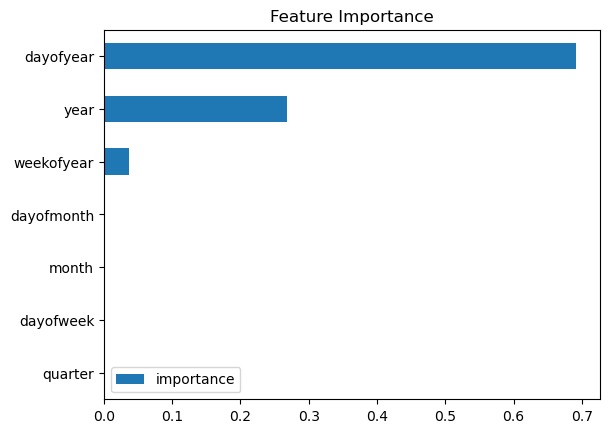

In [398]:
fi = pd.DataFrame(data=dt.feature_importances_,
             index=dt.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- day of the year is most important feature while predicting threemonth sales from Decision Tree Regressor

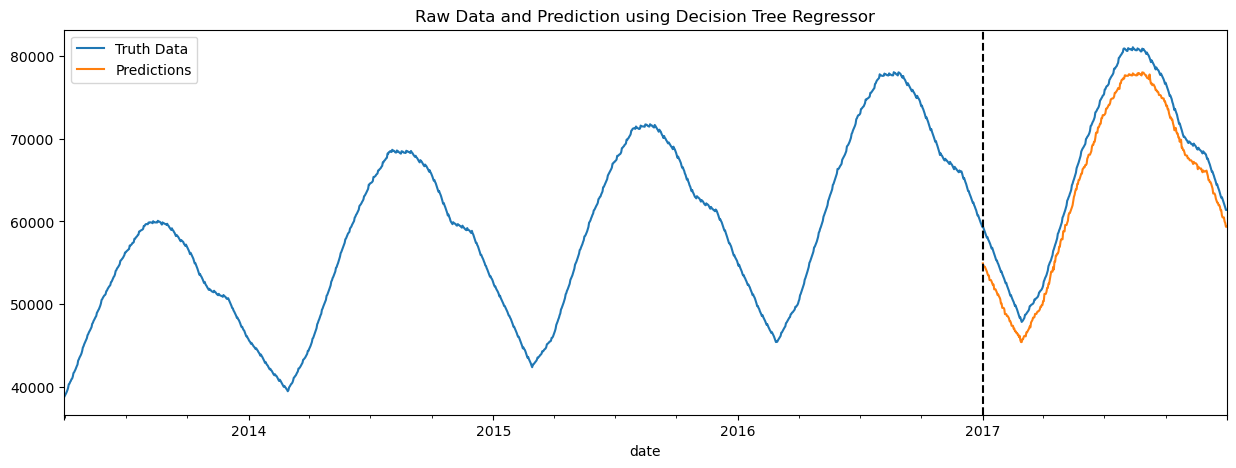

In [399]:
test['prediction_dt'] = y_pred
ff = ff.merge(test[['prediction_dt']], how='left', left_index=True, right_index=True)
ax = ff[['ThreeMonth']].plot(figsize=(15, 5))
ff['prediction_dt'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction using Decision Tree Regressor')
ax.axvline('2017-01-01', color='black', ls='--')
plt.show()

In [400]:
score = np.sqrt(mean_squared_error(test['ThreeMonth'], test['prediction_dt']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 2690.91


## K-NN Regressor

In [401]:
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test)

In [402]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train) 

KNeighborsRegressor()

In [403]:
y_pred=knn.predict(X_test_scaled)
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9070924970301624


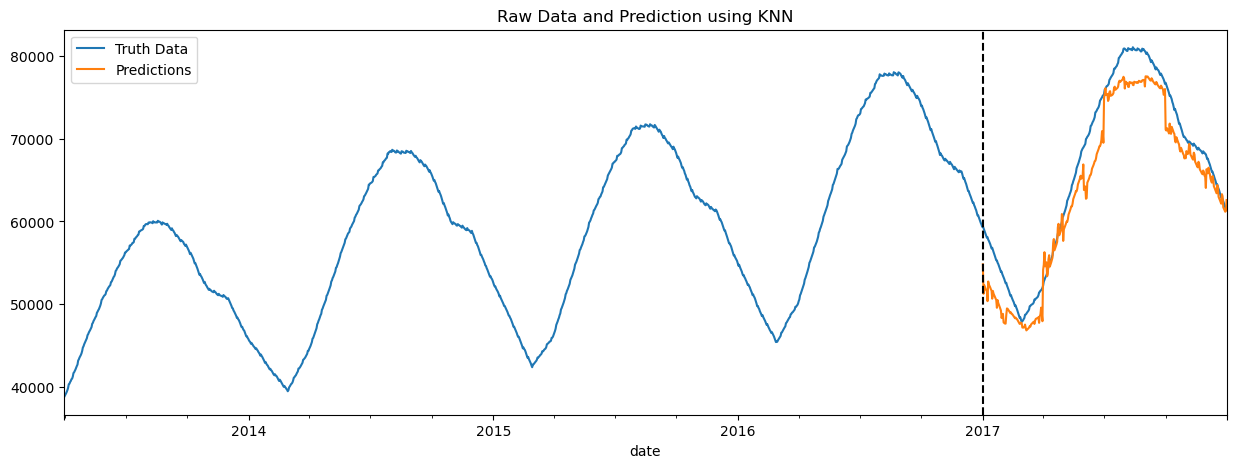

In [404]:
test['prediction_knn'] = y_pred
ff = ff.merge(test[['prediction_knn']], how='left', left_index=True, right_index=True)
ax = ff[['ThreeMonth']].plot(figsize=(15, 5))
ff['prediction_knn'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction using KNN')
ax.axvline('2017-01-01', color='black', ls='--')
plt.show()

In [405]:
score = np.sqrt(mean_squared_error(test['ThreeMonth'], test['prediction_knn']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3227.33


## Random Forest Regressor

In [406]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print(rf.score(X_test,y_test))
#metrics.r2_score(y_test,y_pred)

0.9346763847425293


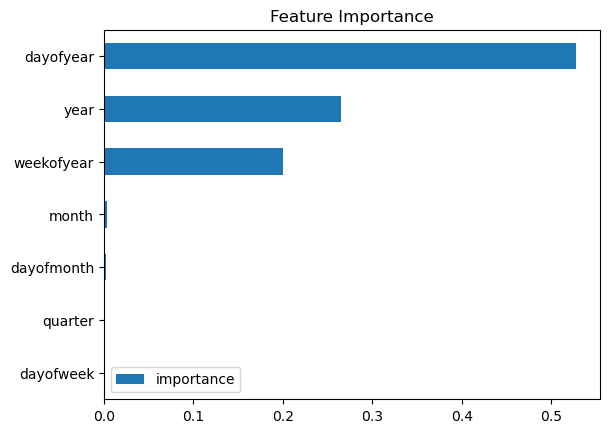

In [407]:
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- day of the year is most important feature while predicting threemonth sales from XGBoost Model`

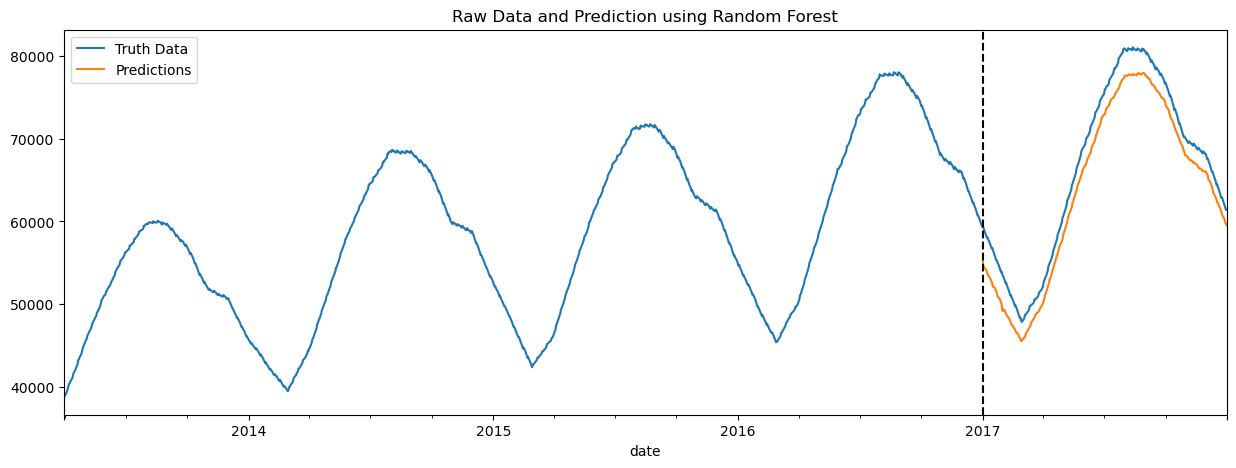

In [408]:
test['prediction_random_forest'] = y_pred
ff = ff.merge(test[['prediction_random_forest']], how='left', left_index=True, right_index=True)
ax = ff[['ThreeMonth']].plot(figsize=(15, 5))
ff['prediction_random_forest'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction using Random Forest')
ax.axvline('2017-01-01', color='black', ls='--')
plt.show()

In [409]:
score = np.sqrt(mean_squared_error(test['ThreeMonth'], test['prediction_random_forest']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 2706.16


## Voting Regressor

In [450]:
from sklearn.ensemble import VotingRegressor # this is the function that ensembles my model
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score

model1 = tree.DecisionTreeRegressor(random_state=34,max_features=4)
model2 = tree.DecisionTreeRegressor(random_state=12,max_features=2)
model3 = tree.DecisionTreeRegressor(random_state=1,max_features=3)

model = VotingRegressor(estimators=[ ('dt1', model1),('dt2', model2),('dt3',model3)]) # it will stitich all the models together, voting = hard means max voting 

model.fit(X_train,y_train) # to train all of the models
y_pred = model.predict(X_test)

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9203923979526362


In [451]:
dt1_feature_importance = model.named_estimators_['dt1'].feature_importances_
dt2_feature_importance = model.named_estimators_['dt2'].feature_importances_
dt3_feature_importance = model.named_estimators_['dt3'].feature_importances_

In [452]:
# Calculate overall feature importance
feature_importance = (dt1_feature_importance + dt2_feature_importance + dt3_feature_importance) / 3

In [453]:
feature_importance

array([0.00219771, 0.0042219 , 0.03896195, 0.26082808, 0.63713849,
       0.0055035 , 0.05114838])

In [454]:
j=['dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']

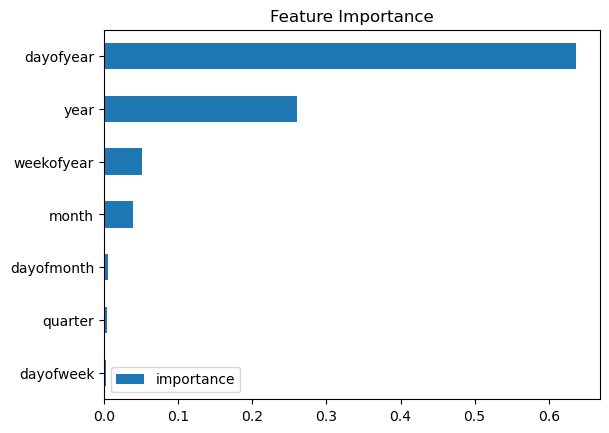

In [455]:
fi = pd.DataFrame(data=feature_importance,
             index=j,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- day of the year and week of the year is most important feature while predicting threemonth sales from Voting Regressor Model

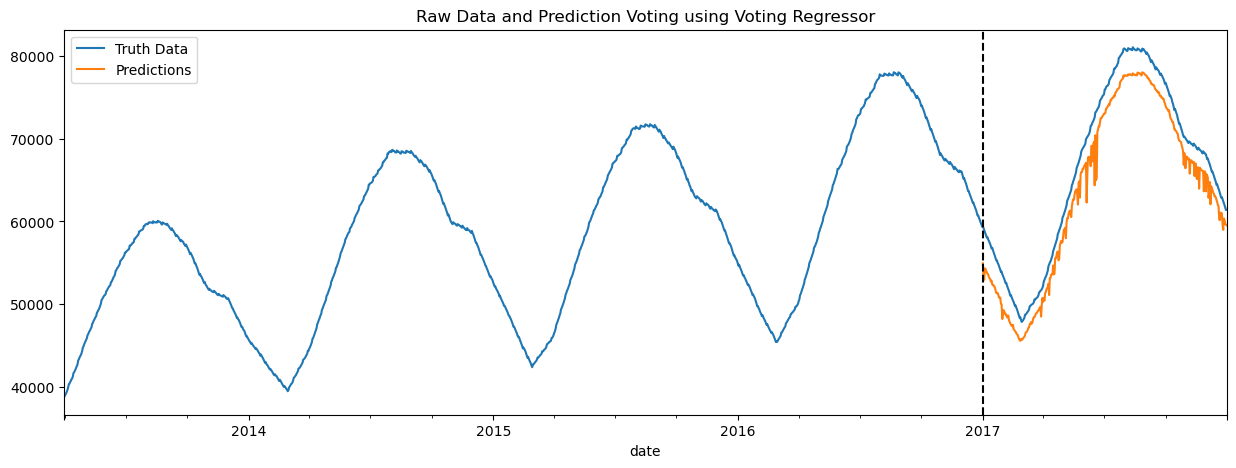

In [456]:
test['prediction_voting_regressor'] = y_pred
ff = ff.merge(test[['prediction_voting_regressor']], how='left', left_index=True, right_index=True)
ax = ff[['ThreeMonth']].plot(figsize=(15, 5))
ff['prediction_voting_regressor'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction Voting using Voting Regressor')
ax.axvline('2017-01-01', color='black', ls='--')
plt.show()

In [460]:
score = np.sqrt(mean_squared_error(test['ThreeMonth'], test['prediction_voting_regressor']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 2987.42


## BaggingRegressor

In [458]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor())
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9353958328176089

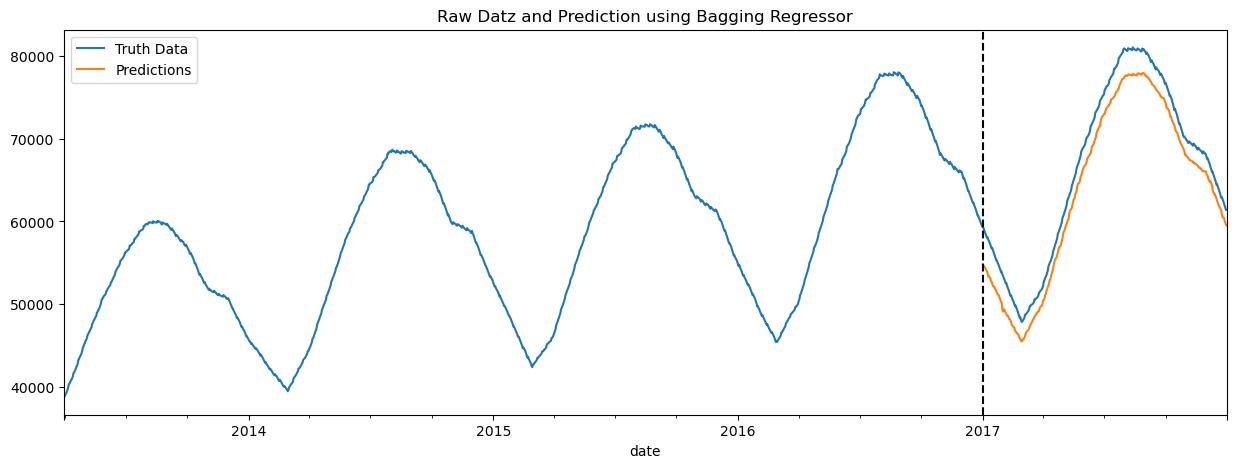

In [459]:
y_pred = model.predict(X_test)
test['prediction_bagging_regressor'] = y_pred
ff = ff.merge(test[['prediction_bagging_regressor']], how='left', left_index=True, right_index=True)
ax = ff[['ThreeMonth']].plot(figsize=(15, 5))
ff['prediction_bagging_regressor'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Datz and Prediction using Bagging Regressor')
ax.axvline('2017-01-01', color='black', ls='--')
plt.show()

In [461]:
score = np.sqrt(mean_squared_error(test['ThreeMonth'], test['prediction_bagging_regressor']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 2691.22


## Build Above Models for All 50 items

In [386]:
knn_r2=[]
dt_r2=[]
rf_r2=[]
vc_r2=[]
br_r2=[]
xg_r2=[]
for n in list(range(1,51)):
    ff=df[df['item']==n] 
    ff=ff.set_index('date')  
    ff.drop(columns=['item',],inplace=True)  #Since We already choosen the item, drop the item column
    ff['ThreeMonth']=ff.rolling(window=90).sum()
    ff.dropna(inplace=True)
    ff.drop(columns=['sales'],inplace=True)
    ff['dayofweek'] = ff.index.dayofweek
    ff['quarter'] = ff.index.quarter
    ff['month'] = ff.index.month
    ff['year'] = ff.index.year
    ff['dayofyear'] = ff.index.dayofyear
    ff['dayofmonth'] = ff.index.day
    ff['weekofyear'] = ff.index.isocalendar().week 
    ff['weekofyear']=ff['weekofyear'].astype("int64")  #We have to change datatype of weekofyear
    ff=ff[[ 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear','ThreeMonth']]
    train = ff.loc[ff.index < '2017-01-01']
    test = ff.loc[ff.index >= '2017-01-01']
    X_train = train.drop(columns=['ThreeMonth'])
    y_train = train['ThreeMonth']
    
    X_test = test.drop(columns=['ThreeMonth'])
    y_test = test['ThreeMonth']
    

    scaler = StandardScaler() #initialise to a variable
    scaler.fit(X_train) # we are finding the values of mean and sd from the td
    X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
    X_test_scaled = scaler.transform(X_test) # transform the test data 
    

    knn = KNeighborsRegressor()
    knn.fit(X_train_scaled, y_train) 
    y_pred=knn.predict(X_test_scaled)
    knn_r2.append(metrics.r2_score(y_test,y_pred))
    

    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train) 
    y_pred=dt.predict(X_test)
    dt_r2.append(metrics.r2_score(y_test,y_pred))
    
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred=rf.predict(X_test)
    rf_r2.append(metrics.r2_score(y_test,y_pred))
    
    model2 = tree.DecisionTreeRegressor(random_state=1)
    model3 = KNeighborsRegressor(3)
    model = VotingRegressor(estimators=[ ('dt', model2),('knn',model3)]) # it will stitich all the models together, voting = hard means max voting 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    vc_r2.append(metrics.r2_score(y_test,y_pred))

    model = BaggingRegressor(tree.DecisionTreeRegressor())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    br_r2.append(metrics.r2_score(y_test,y_pred))
    
    model = XGBRegressor(n_estimators=100)
    model.fit(X_train,y_train) #train the model
    y_pred = model.predict(X_test)
    xg_r2.append(metrics.r2_score(y_test,y_pred))
    


In [387]:
data={"K-NN Regressor":knn_r2,"Decision Tree Regressor":dt_r2,"Random Forest Regressor":rf_r2,"Voting Regressor":vc_r2,"Bagging Regressor":br_r2,"XGB Regressor":xg_r2}
s=list(range(1,51))
d=list(map(str,s))
e=["item "+i for i in d]
all_items=pd.DataFrame(data,index=e)

# R2 score of all ML models on 50 items

In [388]:
all_items

,K-NN Regressor,Decision Tree Regressor,Random Forest Regressor,Voting Regressor,Bagging Regressor,XGB Regressor
item 1,0.908318,0.933569,0.932623,0.907660,0.932773,0.930349
item 2,0.904546,0.933569,0.932900,0.905739,0.932350,0.930936
item 3,0.894802,0.921089,0.920861,0.893231,0.921080,0.919296
item 4,0.915751,0.943247,0.942828,0.920410,0.942800,0.941598
item 5,0.899793,0.926518,0.926357,0.896403,0.926413,0.923890
item 6,0.906027,0.934095,0.933618,0.907871,0.933495,0.932184
item 7,0.909939,0.935559,0.935678,0.909628,0.935830,0.933285
item 8,0.897966,0.924506,0.924168,0.895854,0.923879,0.921736
item 9,0.898528,0.925130,0.924023,0.898075,0.923756,0.921893
item 10,0.886122,0.914740,0.914027,0.884411,0.913736,0.911565
